# Hausaufgabe 2 (HA2): Clustering
Datenquelle: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Verwenden Sie die in der Vorlesung vorgestellten Methoden des unüberwachten Lernens, um die Daten sinnvoll zu segmentieren. Welche Erkenntnisse leiten Sie ab?

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Übersicht über den Datensatz

In [13]:
# Load data
df_scaled = pd.read_csv('my_dataset.csv')
df_scaled.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,OrderCat_Mobile Device,OrderCat_Others,PaymentMode_Cash on Delivery,PaymentMode_Credit Card,PaymentMode_Debit Card,PaymentMode_E wallet,PaymentMode_UPI,MartialStatus_Divorced,MartialStatus_Married,MartialStatus_Single
0,1,0.121212,0,3,0.031746,1,0.625,0.4,2,0.727273,...,0,0,0,0,1,0,0,0,0,1
1,1,0.272727,0,1,0.095238,0,0.625,0.6,3,0.545455,...,1,0,0,0,0,0,1,0,0,1
2,1,0.272727,0,1,0.793651,0,0.375,0.6,3,0.454545,...,1,0,0,0,1,0,0,0,0,1
3,1,0.000000,0,3,0.317460,0,0.375,0.6,5,0.636364,...,0,0,0,0,1,0,0,0,0,1
4,1,0.000000,0,1,0.222222,0,0.625,0.4,5,0.181818,...,1,0,0,1,0,0,0,0,0,1


In [14]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         5630 non-null   int64  
 1   Tenure                        5630 non-null   float64
 2   PreferredLoginDevice          5630 non-null   int64  
 3   CityTier                      5630 non-null   int64  
 4   WarehouseToHome               5630 non-null   float64
 5   Gender                        5630 non-null   int64  
 6   HourSpendOnApp                5630 non-null   float64
 7   NumberOfDeviceRegistered      5630 non-null   float64
 8   SatisfactionScore             5630 non-null   int64  
 9   NumberOfAddress               5630 non-null   float64
 10  Complain                      5630 non-null   int64  
 11  OrderAmountHikeFromlastYear   5630 non-null   float64
 12  CouponUsed                    5630 non-null   float64
 13  Ord

In [15]:
df_scaled.describe()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,OrderCat_Mobile Device,OrderCat_Others,PaymentMode_Cash on Delivery,PaymentMode_Credit Card,PaymentMode_Debit Card,PaymentMode_E wallet,PaymentMode_UPI,MartialStatus_Divorced,MartialStatus_Married,MartialStatus_Single
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,...,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,0.306610,0.290231,1.654707,0.334439,0.398934,0.608659,0.537798,3.066785,0.291636,...,0.369449,0.046892,0.091297,0.315098,0.411012,0.109059,0.073535,0.150622,0.530373,0.319005
std,0.374240,0.251253,0.453909,0.915389,0.256804,0.489723,0.175957,0.204800,1.380194,0.232283,...,0.482699,0.211426,0.288056,0.464596,0.492061,0.311740,0.261035,0.357711,0.499121,0.466133
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.090909,0.000000,1.000000,0.126984,0.000000,0.375000,0.400000,2.000000,0.090909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.272727,0.000000,1.000000,0.285714,0.000000,0.625000,0.600000,3.000000,0.181818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.454545,1.000000,3.000000,0.476190,1.000000,0.625000,0.600000,4.000000,0.454545,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df_scaled.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'OrderCat_Fashion',
       'OrderCat_Grocery', 'OrderCat_Laptop & Accessory',
       'OrderCat_Mobile Device', 'OrderCat_Others',
       'PaymentMode_Cash on Delivery', 'PaymentMode_Credit Card',
       'PaymentMode_Debit Card', 'PaymentMode_E wallet', 'PaymentMode_UPI',
       'MartialStatus_Divorced', 'MartialStatus_Married',
       'MartialStatus_Single'],
      dtype='object')

# Trainings und Test Datensätze erstellen

In [16]:
# Importieren der Funktion 'train_test_split' aus der Bibliothek sklearn.model_selection.
# Diese Funktion ist für die Aufteilung von Daten in Trainings- und Testsets verantwortlich.
from sklearn.model_selection import train_test_split

# Angenommen, 'X' sind Ihre Features und 'y' sind Ihre Labels.
# Diese sollten durch Ihren tatsächlichen DataFrame ersetzt werden.
# 'X' könnte beispielsweise alle Spalten außer der Zielvariable enthalten,
# und 'y' könnte nur die Zielvariable enthalten.
# Beispiel für die Erstellung von 'X' und 'y':
X = df_scaled.drop('Churn', axis=1)  # Entfernt die Spalte 'target_column' aus dem DataFrame und verwendet den Rest als Features.
y = df_scaled['Churn']                # Nutzt die Spalte 'target_column' des DataFrames als Labels (die vorherzusagenden Werte).

# Führt die Aufteilung der Daten in Trainings- und Testsets durch.
# Der Parameter 'test_size=0.2' bestimmt, dass 20% der Daten für das Testset reserviert werden sollen.
# Der Parameter 'random_state=42' sorgt dafür, dass die Zufallsauswahl der Daten konsistent bleibt,
# sodass die Ergebnisse reproduzierbar sind, wenn der Code mehrmals ausgeführt wird.
# Das Ergebnis sind vier separate Datensätze:
# X_train: Die Feature-Daten für das Training.
# X_test: Die Feature-Daten für das Testen.
# y_train: Die Label-Daten für das Training.
# y_test: Die Label-Daten für das Testen.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nach der Ausführung dieses Codes haben Sie zwei Sets von Daten:
# - Trainingsdaten (X_train, y_train), die für das Training Ihres Modells verwendet werden.
# - Testdaten (X_test, y_test), die für die Bewertung der Leistung Ihres Modells verwendet werden.


# Anzahl K (Cluster) ermitteln


## Elbow-Methode

***init:***
<br>***Bedeutung:***<br>
 Dies ist der Initialisierungsparameter, der bestimmt, wie die anfänglichen Zentren der Cluster (also die "Centroids") gesetzt werden, bevor der eigentliche K-Means-Algorithmus beginnt zu laufen.
<br>***Einfache Erklärung:***<br>
 Stellen Sie sich vor, Sie organisieren eine große Party und müssen Gruppentische einrichten. Sie müssen entscheiden, wo die ersten Gäste sitzen sollen, damit später alle anderen Gäste sich um sie herum gruppieren können. Die init-Methode ist wie ein Plan, der Ihnen sagt, wie Sie diese ersten Gäste platzieren, um eine gute Mischung und Balance zu erreichen.
<br>***Detail:***<br>
 Im Falle von k-means++, die als Standardwert für init verwendet wird, werden die ersten Centroids so ausgewählt, dass sie weit voneinander entfernt sind, was in der Regel zu besseren und stabileren Clustering-Ergebnissen führt als eine zufällige Auswahl.

***max_iter:***
<br>***Bedeutung:***<br>
 Dies ist die maximale Anzahl von Durchläufen des K-Means-Algorithmus für einen einzigen Lauf.
<br>***Einfache Erklärung:***<br>
 Betrachten Sie den Prozess des Organisierens von Personen in Gruppen. max_iter ist wie ein Limit dafür, wie oft Sie die Personen bewegen dürfen, um die beste Gruppierung zu finden, bevor Sie sagen: "Okay, das ist gut genug, wir bleiben dabei."
<br>***Detail:***<br>
 In der Praxis kann der K-Means-Algorithmus oft schon vor Erreichen der maximalen Iterationen konvergieren, wenn die Zentren sich nicht mehr wesentlich ändern. Die max_iter-Einstellung stellt sicher, dass der Algorithmus nicht unendlich läuft, falls keine Konvergenz stattfindet.

***n_init:***
<br>***Bedeutung:***<br>
 Die Anzahl der Male, die der K-Means-Algorithmus mit unterschiedlichen zufälligen Centroid-Initialisierungen ausgeführt wird. Der beste Output in Bezug auf die SSE wird als Endresultat ausgegeben.
<br>***Einfache Erklärung:***<br>
 Stellen Sie sich vor, Sie versuchen mehrmal deren Anfangsaufstellung. n_init ist wie die Anzahl der Versuche, die Sie unternehmen, bevor Sie sich für das beste Layout entscheiden.
<br>***Detail:***<br>
 Da die Anfangsplatzierung der Centroids das Endergebnis beeinflussen kann, hilft es, den Algorithmus mehrmals mit verschiedenen Starts zu laufen und das beste Ergebnis zu wählen, um die Abhängigkeit vom Zufall zu minimieren.

### Trainingsdaten

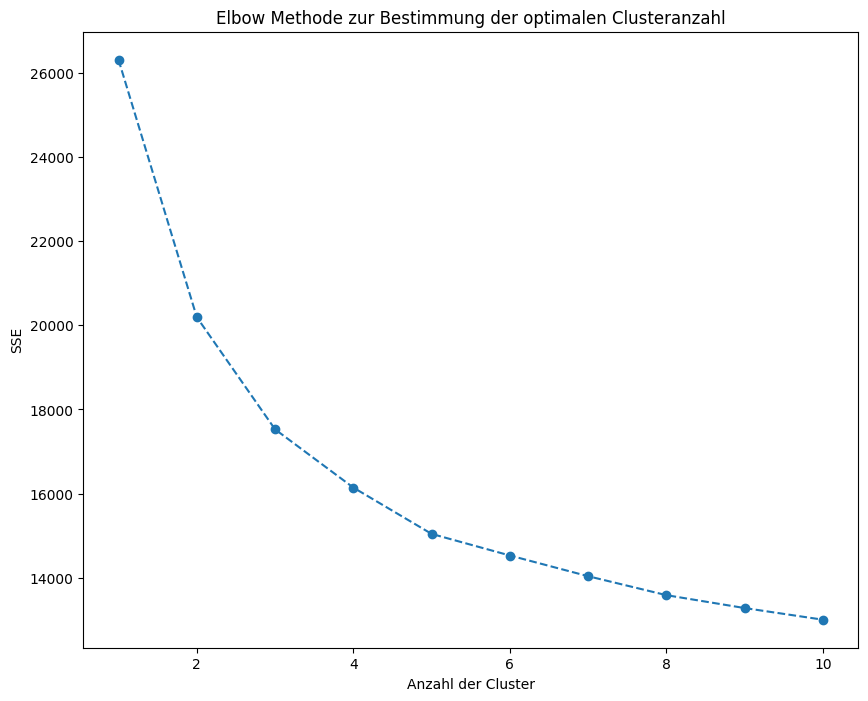

In [17]:
from sklearn.cluster import KMeans  # Importiert die KMeans-Klasse für Clustering
import matplotlib.pyplot as plt  # Importiert matplotlib.pyplot für das Plotten

# Eine Liste, um die Werte für die Summe der quadrierten Fehler (SSE) innerhalb der Cluster zu speichern
sse = []

# Testen Sie eine Reihe verschiedener Clusteranzahlen (von 1 bis 10) und speichern Sie die SSE-Werte
for i in range(1, 11):  # Eine Schleife, die von 1 bis 10 läuft, um verschiedene Anzahlen von Clustern auszuprobieren
    # Erstellt ein KMeans-Objekt mit i Clustern. 'init' gibt die Methode an, die für die Initialisierung der Zentroide verwendet wird.
    # 'max_iter' ist die maximale Anzahl von Iterationen für einen einzelnen Lauf. 'n_init' ist die Anzahl der Male, die der Algorithmus
    # mit verschiedenen Zentroid-Saatgut läuft. 'random_state' gewährleistet die Reproduzierbarkeit der Ergebnisse.
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)  # Trainiert das KMeans-Modell mit den Trainingsdaten.
    sse.append(kmeans.inertia_)  # Fügt der SSE-Liste den SSE-Wert des aktuellen KMeans-Modells hinzu ('inertia_' ist der SSE).

# Erstellen eines Plots zur Visualisierung der Ergebnisse
plt.figure(figsize=(10, 8))  # Setzt die Größe des Plots
plt.plot(range(1, 11), sse, marker='o', linestyle='--')  # Erstellt einen Linienplot mit den SSE-Werten und markiert jeden Punkt mit einem Kreis (o).
plt.title('Elbow Methode zur Bestimmung der optimalen Clusteranzahl')  # Setzt den Titel des Plots.
plt.xlabel('Anzahl der Cluster')  # Beschriftet die x-Achse mit 'Anzahl der Cluster'.
plt.ylabel('SSE')  # Beschriftet die y-Achse mit 'SSE' (Sum of Squared Errors).
plt.show()  # Zeigt den Plot an.


### Ergebnis

Anzahl der Cluster 2,3 bzw. 5 würden als potenzielle kanditaten für die Optimale Cluster anzahl in frage kommen da nach diesen punkten eine Starke abflachung der SSE im vergleich zum verlauf vor diesen punkten besteht.

# Silhouette score 


Silhouette Score for k=2: 0.21720596127337838
Silhouette Score for k=3: 0.1887566126677902
Silhouette Score for k=4: 0.1475026110397244
Silhouette Score for k=5: 0.1545138958287644
Silhouette Score for k=6: 0.14061357087596457
Silhouette Score for k=7: 0.13128243671788214
Silhouette Score for k=8: 0.125252012878334
Silhouette Score for k=9: 0.12190797991650952
Silhouette Score for k=10: 0.11605986890641447
Best number of clusters based on silhouette score: 2


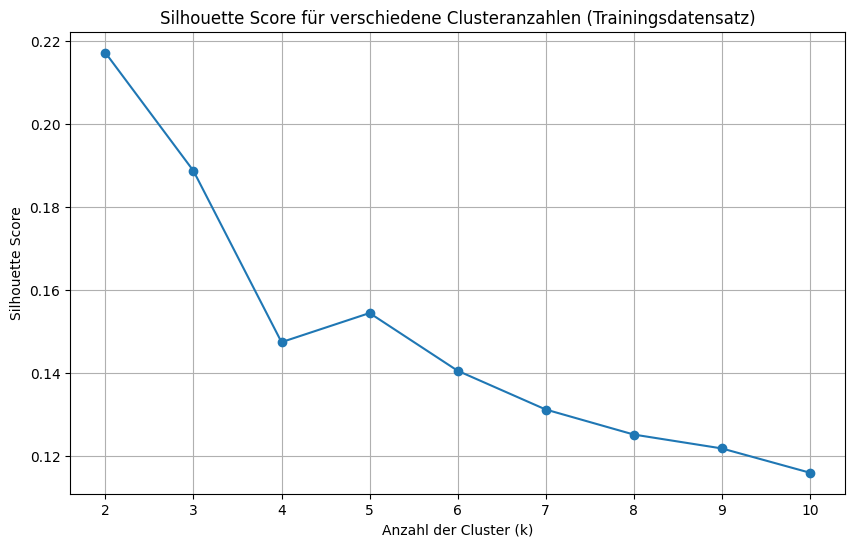

In [18]:
from sklearn.metrics import silhouette_score  # Funktion zur Berechnung des Silhouette Scores importieren

silhouette_scores = []  # Liste zur Speicherung der Silhouette Scores initialisieren

# Schleife von 2 bis 10 für die Clusteranzahl, da Silhouette Score mindestens 2 Cluster benötigt
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)  # KMeans-Objekt mit 'i' Clustern erstellen
    kmeans.fit(X_train)  # KMeans-Algorithmus auf den Trainingsdatensatz anwenden
    score = silhouette_score(X_train, kmeans.labels_)  # Silhouette Score für die Cluster berechnen
    silhouette_scores.append(score)  # Score zur Liste hinzufügen
    print(f"Silhouette Score for k={i}: {score}")  # Ausgabe des Silhouette Scores für die aktuelle Clusteranzahl 'i'

# Anzahl der Cluster mit dem höchsten Silhouette Score ermitteln
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters based on silhouette score: {best_k}")  # Ausgabe der optimalen Clusteranzahl

# Plot-Einstellungen vornehmen
plt.figure(figsize=(10, 6))  # Größe der Plot-Figur festlegen
plt.plot(range(2, 11), silhouette_scores, marker='o')  # Linienplot mit den Silhouette Scores zeichnen
plt.xlabel('Anzahl der Cluster (k)')  # X-Achsen-Beschriftung setzen
plt.ylabel('Silhouette Score')  # Y-Achsen-Beschriftung setzen
plt.title('Silhouette Score für verschiedene Clusteranzahlen (Trainingsdatensatz)')  # Plot-Titel setzen
plt.xticks(range(2, 11))  # X-Achsen-Ticks auf ganze Zahlen setzen
plt.grid(True)  # Raster im Plot anzeigen
plt.show()  # Plot anzeigen



## Ergebnis
Basierend auf dem Silhouette Score wäre das optimale k (Anzahl der Cluster) 2

# Visualisierung 

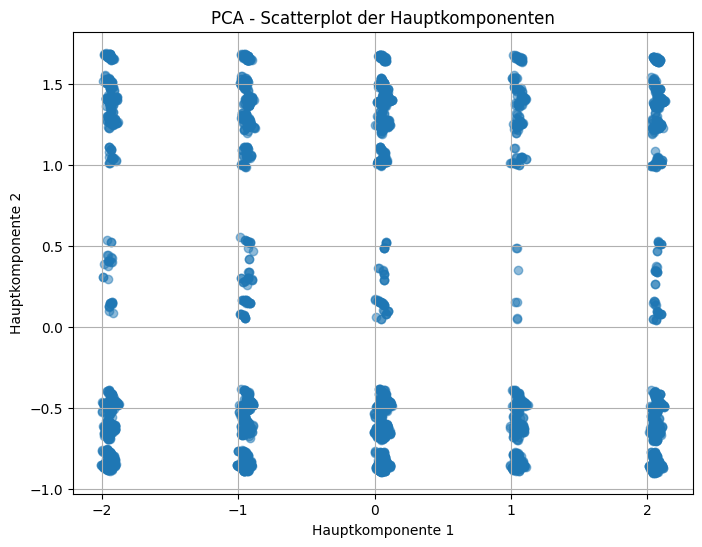

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Angenommen, Sie haben einen DataFrame df, der Ihren Datensatz darstellt.
# Ersetzen Sie 'df' mit Ihrem tatsächlichen DataFrame.

# Die Daten skalieren
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

# PCA durchführen, um auf zwei Komponenten zu reduzieren
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_train)

# Die beiden PCA-Hauptkomponenten in einem Scatterplot visualisieren
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.title('PCA - Scatterplot der Hauptkomponenten')
plt.grid(True)
plt.show()



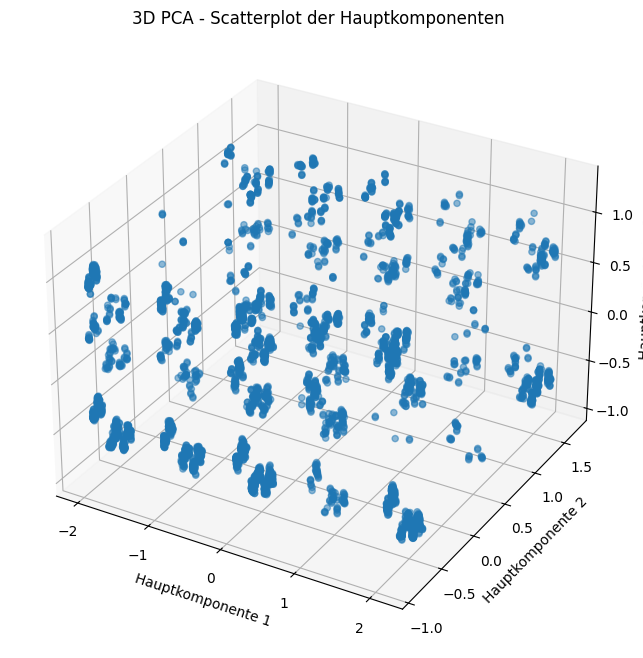

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Angenommen, Sie haben einen DataFrame df, der Ihren Datensatz darstellt.
# Ersetzen Sie 'df' mit Ihrem tatsächlichen DataFrame.

# Die Daten skalieren
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)  # Stellen Sie sicher, dass df Ihr DataFrame ist

# PCA durchführen, um auf drei Komponenten zu reduzieren
pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_train)

# Die drei PCA-Hauptkomponenten in einem 3D Scatterplot visualisieren
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], alpha=0.5)

ax.set_xlabel('Hauptkomponente 1')
ax.set_ylabel('Hauptkomponente 2')
ax.set_zlabel('Hauptkomponente 3')
plt.title('3D PCA - Scatterplot der Hauptkomponenten')
plt.show()


## Ergebnis

aus der Visualisierung lassen sich keine optimale anzahl an k (Clustern) ablesen.
(War zu erwarten da so viele Variablen existieren und nicht in 2D bzw. 3D dargestellt werden können)

# Cluster interpretieren

In [33]:
# Initialisierung des K-Means-Modells mit der spezifizierten Anzahl von Clustern und Parametern.
kmeans = KMeans(n_clusters=2,  # Die Anzahl der Cluster.
                init='k-means++',  # Die Initialisierungsmethode für die Zentren.
                max_iter=300,      # Die maximale Anzahl von Iterationen pro Durchlauf.
                n_init=10,         # Die Anzahl der Durchläufe mit unterschiedlichen Zentren-Initialisierungen.
                random_state=42)   # Der Seed für die Zufallsgenerierung, für reproduzierbare Ergebnisse.

# Anpassen des Modells an die Daten und gleichzeitige Vorhersage der Clusterzugehörigkeit.
cluster_labels = kmeans.fit_predict(X_train)  # Gibt die Cluster-Labels für jede Beobachtung zurück.

# Berechnung der durchschnittlichen Silhouettenbewertung für die Clusterzuordnung.
silhouette_avg = silhouette_score(X_train, cluster_labels)  # Der Silhouetten-Score für die aktuelle Clusterzuordnung.
print(f'Die durchschnittliche Silhouettenbewertung ist: {silhouette_avg}')  # Ausgabe des durchschnittlichen Silhouetten-Scores.

# Erstellung eines neuen DataFrame, um die Trainingsdaten, Cluster-Labels und Churn-Labels zu kombinieren.
train_df_with_clusters = pd.DataFrame(X_train, columns=['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'OrderCat_Fashion',
       'OrderCat_Grocery', 'OrderCat_Laptop & Accessory',
       'OrderCat_Mobile Device', 'OrderCat_Others',
       'PaymentMode_Cash on Delivery', 'PaymentMode_Credit Card',
       'PaymentMode_Debit Card', 'PaymentMode_E wallet', 'PaymentMode_UPI',
       'MartialStatus_Divorced', 'MartialStatus_Married',
       'MartialStatus_Single'])  # Erstellen eines DataFrame aus den Trainingsdaten.
train_df_with_clusters['Cluster_Labels'] = cluster_labels  # Hinzufügen der Cluster-Labels.
train_df_with_clusters['Churn'] = y_train.values  # Hinzufügen der Churn-Labels.

# Berechnung der Churn-Rate für jedes Cluster.
churn_rates = train_df_with_clusters.groupby('Cluster_Labels')['Churn'].mean()  # Durchschnittlicher Churn-Wert pro Cluster.
print(f'Churn-Rate pro Cluster:\n{churn_rates}')  # Ausgabe der Churn-Rate pro Cluster.

# Berechnung der durchschnittlichen Merkmale für jedes Cluster.
cluster_characteristics = train_df_with_clusters.groupby('Cluster_Labels').mean()  # Durchschnittliche Werte der Merkmale pro Cluster.
print(f'Durchschnittliche Merkmale pro Cluster:\n{cluster_characteristics}')  # Ausgabe der durchschnittlichen Merkmale pro Cluster.


Die durchschnittliche Silhouettenbewertung ist: 0.21720596127337838
Churn-Rate pro Cluster:
Cluster_Labels
0    0.120996
1    0.191352
Name: Churn, dtype: float64
Durchschnittliche Merkmale pro Cluster:
                   Churn    Tenure  PreferredLoginDevice  CityTier  \
Cluster_Labels                                                       
0               0.120996  0.307322              0.306050  1.664057   
1               0.191352  0.306648              0.284931  1.656986   

                WarehouseToHome    Gender  HourSpendOnApp  \
Cluster_Labels                                              
0                      0.334497  0.361566        0.600712   
1                      0.336063  0.405937        0.613262   

                NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
Cluster_Labels                                                                 
0                               0.540925           1.332384         0.278874   
1                              

In [30]:
# Initialisierung des K-Means-Modells mit der spezifizierten Anzahl von Clustern und Parametern.
kmeans = KMeans(n_clusters=2,  # Die Anzahl der Cluster.
                init='k-means++',  # Die Initialisierungsmethode für die Zentren.
                max_iter=300,      # Die maximale Anzahl von Iterationen pro Durchlauf.
                n_init=10,         # Die Anzahl der Durchläufe mit unterschiedlichen Zentren-Initialisierungen.
                random_state=42)   # Der Seed für die Zufallsgenerierung, für reproduzierbare Ergebnisse.

# Anpassen des Modells an die Daten und gleichzeitige Vorhersage der Clusterzugehörigkeit.
cluster_labels = kmeans.fit_predict(X_test)  # Gibt die Cluster-Labels für jede Beobachtung zurück.

# Berechnung der durchschnittlichen Silhouettenbewertung für die Clusterzuordnung.
silhouette_avg = silhouette_score(X_test, cluster_labels)  # Der Silhouetten-Score für die aktuelle Clusterzuordnung.
print(f'Die durchschnittliche Silhouettenbewertung ist: {silhouette_avg}')  # Ausgabe des durchschnittlichen Silhouetten-Scores.

# Erstellung eines neuen DataFrame, um die Trainingsdaten, Cluster-Labels und Churn-Labels zu kombinieren.
train_df_with_clusters = pd.DataFrame(X_test, columns=['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'OrderCat_Fashion',
       'OrderCat_Grocery', 'OrderCat_Laptop & Accessory',
       'OrderCat_Mobile Device', 'OrderCat_Others',
       'PaymentMode_Cash on Delivery', 'PaymentMode_Credit Card',
       'PaymentMode_Debit Card', 'PaymentMode_E wallet', 'PaymentMode_UPI',
       'MartialStatus_Divorced', 'MartialStatus_Married',
       'MartialStatus_Single'])  # Erstellen eines DataFrame aus den Trainingsdaten.
train_df_with_clusters['Cluster_Labels'] = cluster_labels  # Hinzufügen der Cluster-Labels.
train_df_with_clusters['Churn'] = y_test.values  # Hinzufügen der Churn-Labels.

# Berechnung der Churn-Rate für jedes Cluster.
churn_rates = train_df_with_clusters.groupby('Cluster_Labels')['Churn'].mean()  # Durchschnittlicher Churn-Wert pro Cluster.
print(f'Churn-Rate pro Cluster:\n{churn_rates}')  # Ausgabe der Churn-Rate pro Cluster.

# Berechnung der durchschnittlichen Merkmale für jedes Cluster.
cluster_characteristics = train_df_with_clusters.groupby('Cluster_Labels').mean()  # Durchschnittliche Werte der Merkmale pro Cluster.
print(f'Durchschnittliche Merkmale pro Cluster:\n{cluster_characteristics}')  # Ausgabe der durchschnittlichen Merkmale pro Cluster.

Die durchschnittliche Silhouettenbewertung ist: 0.2185240151154184
Churn-Rate pro Cluster:
Cluster_Labels
0    0.188220
1    0.110145
Name: Churn, dtype: float64
Durchschnittliche Merkmale pro Cluster:
                   Churn    Tenure  PreferredLoginDevice  CityTier  \
Cluster_Labels                                                       
0               0.188220  0.306290              0.295775  1.583867   
1               0.110145  0.304084              0.260870  1.756522   

                WarehouseToHome    Gender  HourSpendOnApp  \
Cluster_Labels                                              
0                      0.343109  0.435339        0.603553   
1                      0.299977  0.405797        0.611232   

                NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
Cluster_Labels                                                                 
0                               0.532907           3.856594         0.312653   
1                               

In [22]:
# KMeans-Algorithmus mit 2 Clustern initialisieren
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train)  # KMeans-Algorithmus auf den Trainingsdatensatz anwenden

# Die Cluster-Zuordnungen für jede Beobachtung im Datensatz erhalten
clusters = kmeans.labels_

# Fügt die Cluster-Zuordnungen als eine neue Spalte dem Trainingsdatensatz hinzu
X_train_clustered = X_train.copy()
X_train_clustered['cluster'] = clusters

# Zeigt die ersten paar Zeilen des neuen Dataframes an
print(X_train_clustered.head())

# Optional: Ermitteln der Zentroide
centroids = kmeans.cluster_centers_
print(centroids)

# Optional: Berechnen der Anzahl der Beobachtungen in jedem Cluster
print(X_train_clustered['cluster'].value_counts())

# Jetzt können Sie den Kontext analysieren, indem Sie die Eigenschaften innerhalb jedes Clusters untersuchen
# Zum Beispiel können Sie die Mittelwerte der Features pro Cluster betrachten, um zu sehen, was die Cluster charakterisiert
cluster_summary = X_train_clustered.groupby('cluster').mean()
print(cluster_summary)


        Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
4478  0.030303                     0         1         0.222222       1   
3685  0.515152                     0         1         0.253968       1   
731   0.000000                     0         1         0.126984       0   
291   0.272727                     1         1         0.095238       0   
184   0.121212                     0         1         0.190476       0   

      HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
4478           0.625                       0.6                  4   
3685           0.875                       0.8                  3   
731            0.625                       0.6                  3   
291            0.375                       0.4                  2   
184            0.375                       0.4                  2   

      NumberOfAddress  Complain  ...  OrderCat_Others  \
4478         0.181818         1  ...                0   
3685         0.18181

^^^^Dieser Code führt folgende Schritte aus:^^^^

Er initialisiert und passt das K-Means-Modell mit 2 Clustern auf den Trainingsdatensatz an.
Er ordnet jede Beobachtung in X_train einem der zwei Cluster zu und fügt diese Zuordnung dem DataFrame als neue Spalte hinzu.
Er gibt die ersten paar Zeilen des neuen DataFrames aus, sodass Sie sehen können, welchen Cluster jede Beobachtung zugeordnet wurde.
Er gibt die Koordinaten der zwei Clusterzentren aus.
Er berechnet, wie viele Beobachtungen jedem Cluster zugeordnet wurden.
Er erstellt eine Zusammenfassung, die die durchschnittlichen Werte der Features für jeden Cluster zeigt.
Sobald Sie diese Informationen haben, können Sie die Eigenschaften der Beobachtungen in jedem Cluster analysieren, um zu verstehen, was diese Cluster charakterisiert und wie sie sich voneinander unterscheiden. Dies hilft Ihnen, die Cluster basierend auf den dominanten Eigenschaften oder Verhaltensweisen, die sie repräsentieren, sinnvoll zu benennen.